In [83]:
from fair import FAIR


In [84]:
f = FAIR()

In [85]:
from fair.io import read_properties
f.define_time(2000, 2050, 1)
f.define_scenarios(['abrupt', 'ramp'])
f.define_configs(['high', 'central', 'low'])
species, properties = read_properties('examples/data/importing-data/species_configs_properties.csv')
f.define_species(species[0:3], properties)
f.ghg_method='Myhre1998'


In [86]:
f.allocate()

In [87]:
from fair.interface import fill
fill(f.emissions, 40, scenario='abrupt', specie='CO2 FFI')
fill(f.emissions, 40, scenario='ramp', specie='CO2 FFI')
fill(f.emissions, 10, scenario='abrupt', specie='CO2 AFOLU')
fill(f.emissions, 10, scenario='ramp', specie='CO2 AFOLU')

In [88]:
f.override_defaults('examples/data/basic_run_example/configs_ensemble.csv')


In [89]:
f.emissions

<xarray.DataArray (timepoints: 50, scenario: 2, config: 3, specie: 3)> Size: 7kB
array([[[[40., 10., nan],
         [40., 10., nan],
         [40., 10., nan]],

        [[40., 10., nan],
         [40., 10., nan],
         [40., 10., nan]]],


       [[[40., 10., nan],
         [40., 10., nan],
         [40., 10., nan]],

        [[40., 10., nan],
         [40., 10., nan],
         [40., 10., nan]]],


       [[[40., 10., nan],
         [40., 10., nan],
...
         [40., 10., nan],
         [40., 10., nan]]],


       [[[40., 10., nan],
         [40., 10., nan],
         [40., 10., nan]],

        [[40., 10., nan],
         [40., 10., nan],
         [40., 10., nan]]],


       [[[40., 10., nan],
         [40., 10., nan],
         [40., 10., nan]],

        [[40., 10., nan],
         [40., 10., nan],
         [40., 10., nan]]]])
Coordinates:
  * timepoints  (timepoints) float64 400B 2e+03 2.002e+03 ... 2.048e+03 2.05e+03
  * scenario    (scenario) <U6 48B 'abrupt' 'ramp'
  * config      (config) <U7 84B 'high' 'central' 'low'
  * specie      (specie) <U9 108B 'CO2 FFI' 'CO2 AFOLU' 'CO2'

In [95]:
from fair.interface import initialise

initialise(f.concentration, 278.3, specie='CO2')
initialise(f.forcing, 0)
initialise(f.temperature, 30)
initialise(f.cumulative_emissions, 0)
initialise(f.airborne_emissions, 0)
initialise(f.ocean_heat_content_change, 0)

f.run()

Running 6 projections in parallel: 100%|██████████| 50/50 [00:00<00:00, 3581.32timesteps/s]


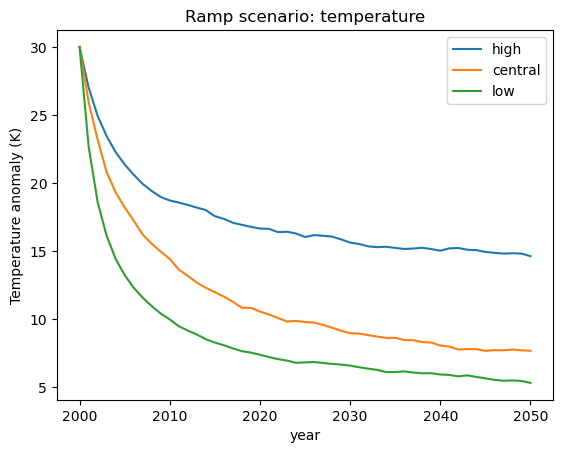

In [96]:
import matplotlib.pyplot as pl


pl.plot(f.timebounds, f.temperature.loc[dict(scenario='ramp', layer=0)], label=f.configs)
pl.title('Ramp scenario: temperature')
pl.xlabel('year')
pl.ylabel('Temperature anomaly (K)')
pl.legend()